# FDP Project

In [1]:
# %pip install yfinance
# %pip install arch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from yfinance import Ticker
import yfinance as yf
from arch import arch_model


In [2]:
# load data from CRSP.csv
pd.set_option('display.max_columns', None) # This will show all columns
data = pd.read_csv('CRSP.csv')


In [3]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-10-19,15.00,16.320,14.01,14.09,14.09,1884300
1,2016-10-20,14.06,14.230,13.85,13.94,13.94,355600
2,2016-10-21,14.00,14.179,13.75,13.82,13.82,113900
3,2016-10-24,14.05,14.148,13.90,14.01,14.01,100700
4,2016-10-25,14.15,14.500,14.01,14.41,14.41,85100


In [4]:
data['Date'] = pd.to_datetime(data['Date'])

In [5]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-10-19,15.00,16.320,14.01,14.09,14.09,1884300
1,2016-10-20,14.06,14.230,13.85,13.94,13.94,355600
2,2016-10-21,14.00,14.179,13.75,13.82,13.82,113900
3,2016-10-24,14.05,14.148,13.90,14.01,14.01,100700
4,2016-10-25,14.15,14.500,14.01,14.41,14.41,85100


## Plotting the prices

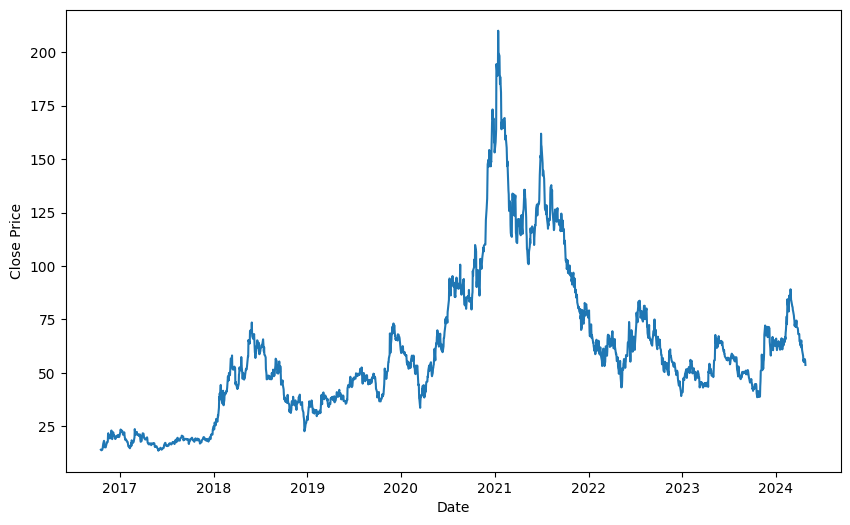

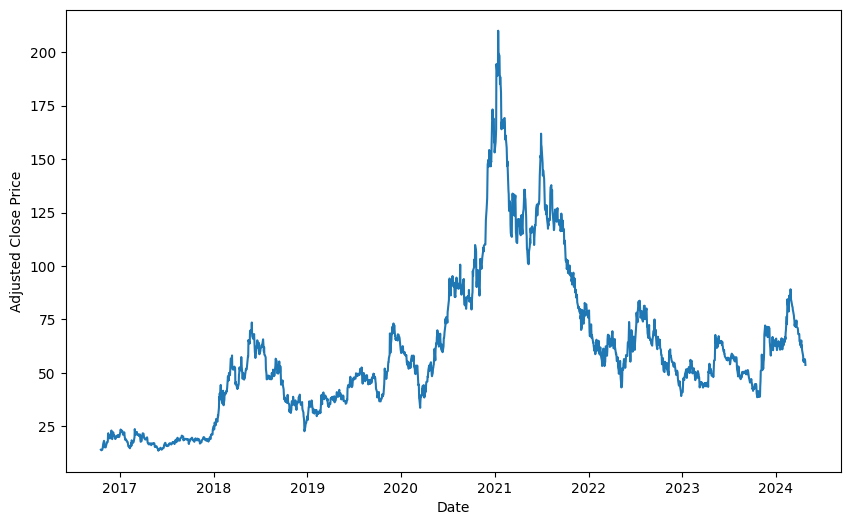

In [19]:
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Close'])
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Adj Close'])
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.show()

## Plotting the log returns

In [7]:
log_return = np.log(data['Adj Close']) - np.log(data['Adj Close'].shift(1))
print(log_return)

0            NaN
1      -0.010703
2      -0.008646
3       0.013655
4       0.028151
          ...   
1886   -0.019963
1887    0.011020
1888    0.013385
1889   -0.013564
1890   -0.035111
Name: Adj Close, Length: 1891, dtype: float64


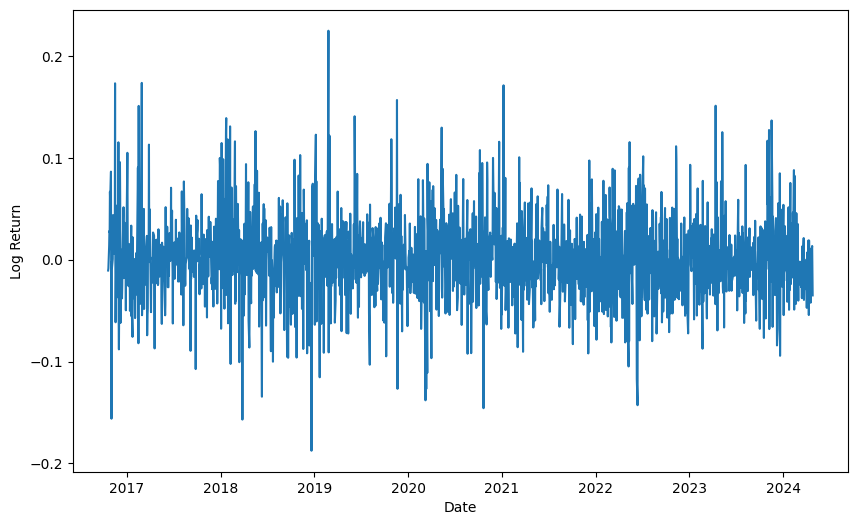

In [22]:
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], log_return)
plt.xlabel('Date')
plt.ylabel('Log Return')
plt.show()

## Checking for normality of the log returns

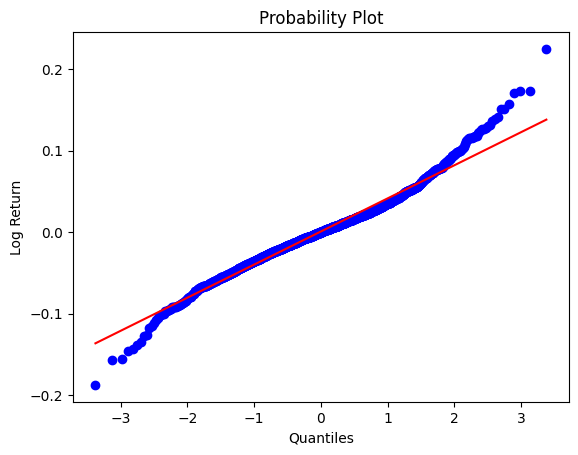

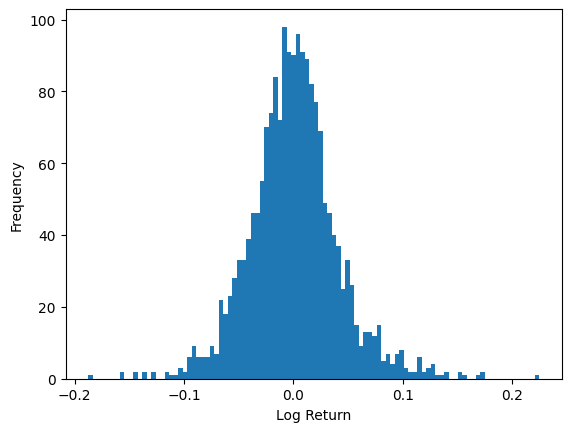

Mean                : 0.0007082043274233551
Median              : 0.0
Skewness            : 0.3041395413938361
Kurtosis            : 2.0415256889499362
Standard deviation  : 0.04107023226306851

The data is platykurtic since the kurtosis is less than 3

Jarque-Bera test p-value: SignificanceResult(statistic=357.35415826946246, pvalue=2.5207541403684207e-78)
Reject the null hypothesis that the data is normally distributed

Kolmogorov-Smirnov test p-value: KstestResult(statistic=0.45194820924281054, pvalue=0.0, statistic_location=-0.09672594219276043, statistic_sign=-1)
Reject the null hypothesis that the data is normally distributed


In [23]:
stats.probplot(log_return[1:], dist="norm", plot=plt)
plt.xlabel('Quantiles')
plt.ylabel('Log Return')
plt.show()

plt.hist(log_return[1:], bins=100)
plt.xlabel('Log Return')
plt.ylabel('Frequency')
plt.show()

# print the summary statistics of the log-returns, like mean, median, skewness, kurtosis, and standard deviation
print(f"Mean                : {np.mean(log_return[1:])}")
print(f"Median              : {np.median(log_return[1:])}")
print(f"Skewness            : {stats.skew(log_return[1:])}")
print(f"Kurtosis            : {stats.kurtosis(log_return[1:])}")
print(f"Standard deviation  : {np.std(log_return[1:])}")
print()


if stats.kurtosis(log_return[1:]) > 3:
    print("The data is leptokurtic since the kurtosis is greater than 3")
elif stats.kurtosis(log_return[1:]) < 3:
    print("The data is platykurtic since the kurtosis is less than 3")
else:
    print("The data is mesokurtic since the kurtosis is equal to 3")
print()

# Jarque-Bera test
p_value = stats.jarque_bera(log_return[1:])
print(f"Jarque-Bera test p-value: {p_value}")

if p_value[1] < 0.05:
    print("Reject the null hypothesis that the data is normally distributed")
else:
    print("Fail to reject the null hypothesis that the data is normally distributed")
print()

# Kolmogorov-Smirnov test
p_value = stats.kstest(log_return[1:], 'norm')
print(f"Kolmogorov-Smirnov test p-value: {p_value}")

if p_value[1] < 0.05:
    print("Reject the null hypothesis that the data is normally distributed")
else:
    print("Fail to reject the null hypothesis that the data is normally distributed")



## Estimating the volatility 

### Estimating historical volatility

In [10]:
std_log_return = np.std(log_return[1:])
historical_volatility = np.sqrt(252) * std_log_return # 252 trading days in a year (as done in class)
print(f"Std of log returns      : {std_log_return}")
print(f"Annualized volatility   : {historical_volatility * 100} %")


Std of log returns      : 0.04107023226306851
Annualized volatility   : 65.19697251344446 %


### Estimate the volatility using GARACH

Iteration:      1,   Func. Count:      6,   Neg. LLF: 1330837998386408.5
Iteration:      2,   Func. Count:     18,   Neg. LLF: 1871913732.2431874
Optimization terminated successfully    (Exit mode 0)
            Current function value: -3389.306190306527
            Iterations: 2
            Function evaluations: 26
            Gradient evaluations: 2


d:\ProgramData\Anaconda3\envs\ai\lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001687. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


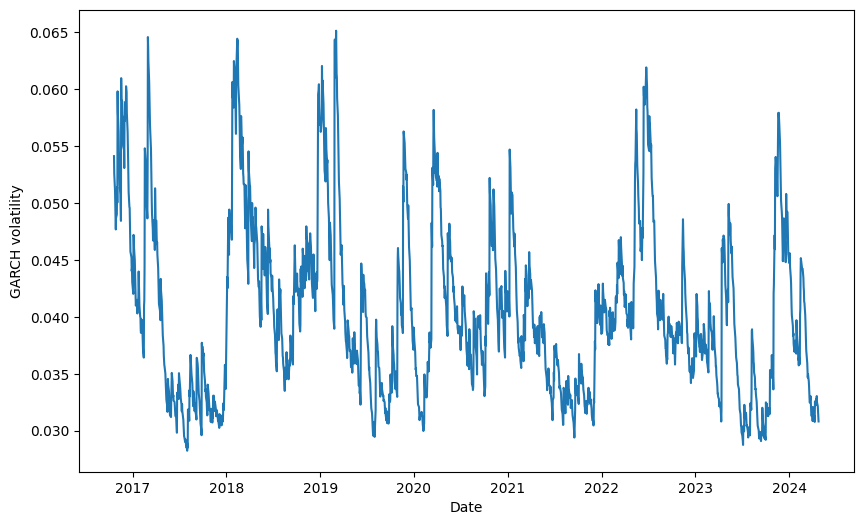

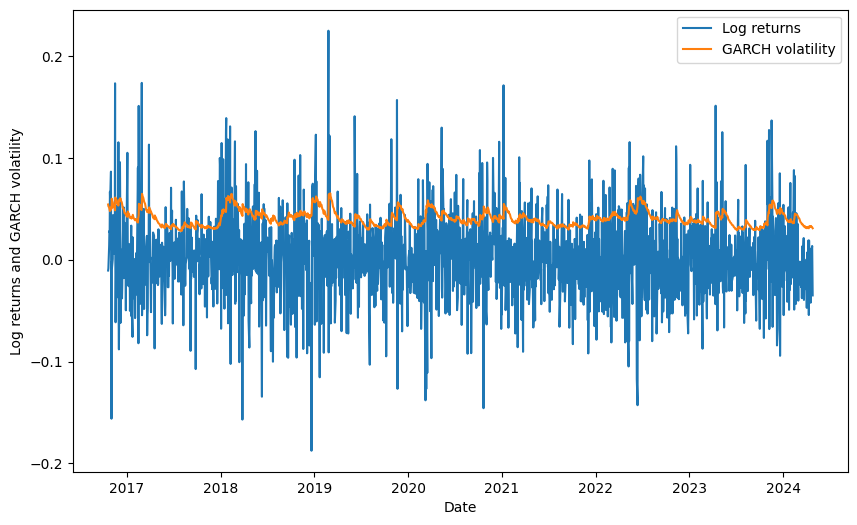

Average GARCH volatility    : 0.6437506311699578
Historical volatility       : 0.6519697251344446


In [24]:
# GARCH model
garch = arch_model(log_return[1:], vol='Garch', p=1, q=1, dist='Normal')
garch_fit = garch.fit()
garch_volatility = garch_fit.conditional_volatility

# plot the GARCH volatility
plt.figure(figsize=(10, 6))
plt.plot(data['Date'][1:], garch_volatility)
plt.xlabel('Date')
plt.ylabel('GARCH volatility')
plt.show()

# plot log returns and GARCH volatility
plt.figure(figsize=(10, 6))
plt.plot(data['Date'][1:], log_return[1:], label='Log returns')
plt.plot(data['Date'][1:], garch_volatility, label='GARCH volatility')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Log returns and GARCH volatility')
plt.show()

# average the GARCH volatility
average_garch_volatility = np.mean(garch_volatility)
print(f"Average GARCH volatility    : {average_garch_volatility * np.sqrt(252)}")
print(f"Historical volatility       : {historical_volatility}")



## Risk Free Rate

In [12]:
risk_free_rate_calculated = Ticker('^IRX')
risk_free_rate_calculated = risk_free_rate_calculated.info['previousClose'] / 100
print(f"Risk free rate: {risk_free_rate_calculated}")

Risk free rate: 0.05238


## Autocorrelation of the log returns

Pearson correlation coefficient: PearsonRResult(statistic=0.017521426044784228, pvalue=0.446608353245165)
Fail to reject the null hypothesis that the log returns are not correlated


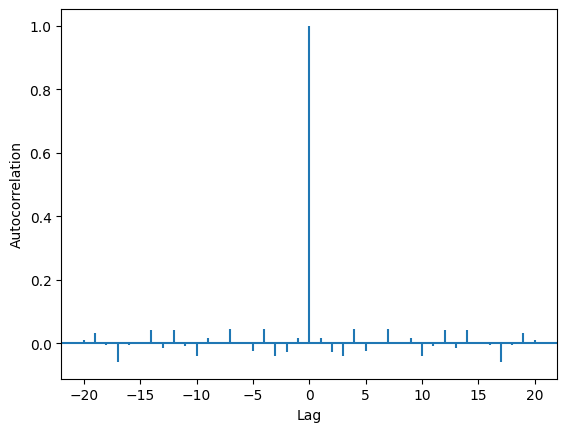

In [26]:
valid_indices = np.logical_and(~np.isnan(log_return[1:]), ~np.isnan(log_return.shift(1)[1:]))
correlation_coefficient = stats.pearsonr(log_return[1:][valid_indices], log_return.shift(1)[1:][valid_indices])
print(f"Pearson correlation coefficient: {correlation_coefficient}")

p_value = correlation_coefficient[1]
if p_value < 0.05:
    print("Reject the null hypothesis that the log returns are not correlated")
else:
    print("Fail to reject the null hypothesis that the log returns are not correlated")

# plot autocorrelation of log-returns
plt.acorr(log_return[1:], maxlags=20)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()


Since the correlation coefficient is close to zero, we can conclude that the log returns are independent. (also, the p-value is less than 0.05, so we can reject the null hypothesis that the log returns are correlated)

## Calculating the option price

In [14]:
# in the money european call option and put option
today_date = data['Date'][len(data['Date']) - 1]
maturity_date = pd.Timestamp('2024-05-31')
time_to_maturity = (maturity_date - today_date).days / 365
risk_free_rate = risk_free_rate_calculated
strike_price_call = 51 # Since the stock price is 53.75, the call option is in the money
strike_price_put = 55 # Since the stock price is 53.75, the put option is in the money
current_stock_price = data['Adj Close'][len(data['Adj Close']) - 1]

print(f"Time to maturity                : {time_to_maturity * np.round(365, 2)} days")
print(f"Time to maturity                : {time_to_maturity} years")
print(f"Maturity date                   : {maturity_date}")
print(f"Risk free rate                  : {risk_free_rate}")
print(f"Strike price for call option    : {strike_price_call}")
print(f"Strike price for put option     : {strike_price_put}")
print(f"Current stock price             : {current_stock_price}")
print(f"Volatility                      : {historical_volatility}")




Time to maturity                : 36.0 days
Time to maturity                : 0.09863013698630137 years
Maturity date                   : 2024-05-31 00:00:00
Risk free rate                  : 0.05238
Strike price for call option    : 51
Strike price for put option     : 55
Current stock price             : 53.73
Volatility                      : 0.6519697251344446


### CRR Method

In [15]:
stock_price = current_stock_price
volatility = historical_volatility
n = 100 # number of steps
u = np.exp(volatility * np.sqrt(time_to_maturity / n))
d = 1 / u
r = np.exp(risk_free_rate * time_to_maturity / n) # risk free rate
p = (r - d) / (u - d)
q = 1 - p

def calculate_option_price_crr(stock_price, strike_price, n, p, q, option_type):
    option_price = 0
    for i in range(n + 1):
        stock_price_i = stock_price * (u ** (n - i)) * (d ** i)
        if option_type == 'call':
            option_price += max(0, stock_price_i - strike_price) * stats.binom.pmf(i, n, p)
        elif option_type == 'put':
            option_price += max(0, strike_price - stock_price_i) * stats.binom.pmf(i, n, p)
    return option_price

call_option_price = calculate_option_price_crr(stock_price, strike_price_call, n, p, q, 'call')
put_option_price = calculate_option_price_crr(stock_price, strike_price_put, n, p, q, 'put')

print(f"Call option price using CRR method  : {call_option_price}")
print(f"Put option price using CRR method   : {put_option_price}")


Call option price using CRR method  : 7.130172466666928
Put option price using CRR method   : 4.164136990869112


### Black-Scholes Method

In [16]:
def black_scholes(stock_price, strike_price, time_to_maturity, risk_free_rate, volatility, option_type):
    d1 = (np.log(stock_price / strike_price) + (risk_free_rate + volatility ** 2 / 2) * time_to_maturity) / (volatility * np.sqrt(time_to_maturity))
    d2 = d1 - volatility * np.sqrt(time_to_maturity)
    if option_type == 'call':
        option_price = stock_price * stats.norm.cdf(d1) - strike_price * np.exp(-risk_free_rate * time_to_maturity) * stats.norm.cdf(d2)
    elif option_type == 'put':
        option_price = strike_price * np.exp(-risk_free_rate * time_to_maturity) * stats.norm.cdf(-d2) - stock_price * stats.norm.cdf(-d1)
    return option_price

call_option_price = black_scholes(stock_price, strike_price_call, time_to_maturity, risk_free_rate, volatility, 'call')
put_option_price = black_scholes(stock_price, strike_price_put, time_to_maturity, risk_free_rate, volatility, 'put')

print(f"Call option price using Black-Scholes method    : {call_option_price}")
print(f"Put option price using Black-Scholes method     : {put_option_price}")


Call option price using Black-Scholes method    : 5.9207964255989225
Put option price using Black-Scholes method     : 4.932184675957885


### Simulation method - Geometric Brownian motion 

Call option price using GBM simulation method: 5.770229337007897
Put option price using  GBM simulation method: 5.003717510579303


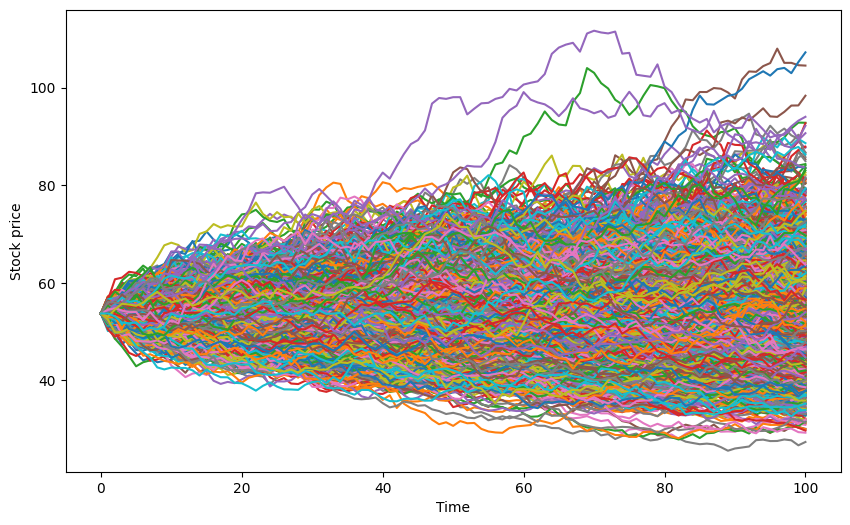

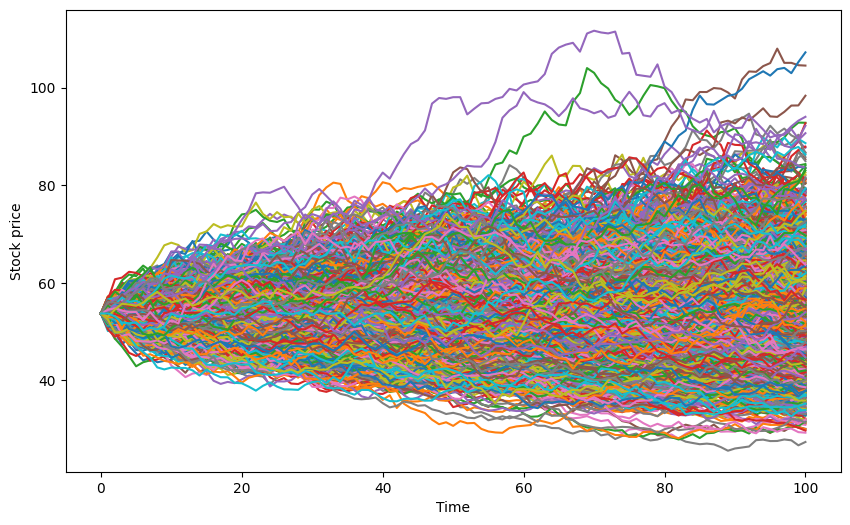

In [27]:
# Simulate - Geometric Brownian motion
n = 100
dt = time_to_maturity / n
call_option_price = 0
put_option_price = 0
all_paths = []

def simulate_geometric_brownian_motion(stock_price, risk_free_rate, volatility, time_to_maturity, n):
    dt = time_to_maturity / n
    # we need to simulate 1000 paths
    for i in range(1000):
        stock_price_sim_list = []
        stock_price_i = stock_price
        stock_price_sim_list.append(stock_price_i)
        for j in range(n):
            stock_price_i *= np.exp((risk_free_rate - 0.5 * volatility ** 2) * dt + volatility * np.sqrt(dt) * np.random.normal())
            # Since S0 = S0 * exp((r - sigma^2/2) * dt + sigma * sqrt(dt) * Z)
            stock_price_sim_list.append(stock_price_i)
        all_paths.append(stock_price_sim_list)
    return all_paths


def calculate_option_price_GBM(stock_price, strike_price, risk_free_rate, volatility, time_to_maturity, n, option_type):
    all_paths = simulate_geometric_brownian_motion(stock_price, risk_free_rate, volatility, time_to_maturity, n)
    call_option_price = 0
    put_option_price = 0
    for i in range(len(all_paths)):
        if option_type == 'call':
            call_option_price += max(0, all_paths[i][-1] - strike_price)
        elif option_type == 'put':
            put_option_price += max(0, strike_price - all_paths[i][-1])
    call_option_price = call_option_price / len(all_paths)
    put_option_price = put_option_price / len(all_paths)
    return call_option_price, put_option_price, all_paths

call_option_price, _ , all_paths_call = calculate_option_price_GBM(stock_price, strike_price_call, risk_free_rate, volatility, time_to_maturity, n, 'call')
_, put_option_price, all_paths_put = calculate_option_price_GBM(stock_price, strike_price_put, risk_free_rate, volatility, time_to_maturity, n, 'put')



# discount the option price
call_option_price = call_option_price * np.exp(-risk_free_rate * time_to_maturity)
put_option_price = put_option_price * np.exp(-risk_free_rate * time_to_maturity)

print(f"Call option price using GBM simulation method: {call_option_price}")
print(f"Put option price using  GBM simulation method: {put_option_price}")

def plot_paths(all_paths):
    plt.figure(figsize=(10, 6))
    for i in range(len(all_paths)):
        plt.plot(all_paths[i])
    plt.xlabel('Time')
    plt.ylabel('Stock price')
    plt.show()

plot_paths(all_paths_call)
plot_paths(all_paths_put)
